# Python による平面曲線のプロット

本稿は SymPy のプロット機能を主に利用して、有名な平面曲線のプロットを試す。
最初に Jupyter でプロットを実行するための準備を行う。ここでは NumPy および SymPy を利用する。
それからは曲線をひたすらプロットしていくだけの内容だ。

曲線は基本的には微分可能多様体であるので、次のいずれかの表現で与えられるのがほとんどだ：

1. 陰関数表示
2. パラメーター表示
3. グラフ表示

SymPy はそれぞれに相応しいプロット関数を提供しているので、本稿の構成もそれに合わせて節を分ける。

## Jupyter のための準備

この節のコードは、以降のプロット処理を実現するのに必要な共通機能のロードや設定を行うだけだ。

In [1]:
from sympy.plotting import plot, plot_implicit, plot_parametric
from sympy import symbols
import numpy as np # arange, linspace, etc.
%matplotlib inline

本稿では基本的に SymPy のプロット機能しか使わない。最初の `import` 文でプロット関数をすべて取り入れる。

曲線を表現する数式を構成する記号を定義するために、関数 `symbols` を取り込む。

モジュール `numpy` は、浮動小数点数で表現される区間を等分割する点列を与える便利な関数があるのでモジュールごと取り込む。

最後に IPython の `matplotlib` コマンドを実行して、以降のプロット描画をインライン出力させる。

## 陰関数表示された曲線をプロットする

この節では陰関数表示された平面曲線をプロットしていく。ここで扱う曲線はすべて $f(x, y) = 0$ の形式で表現されるようにしておくと、SymPy のプロット関数 `plot_implicit` が容易に呼び出せる。

陰関数の変数のために記号 `x`, `y` を定義しておく。

In [2]:
x, y = symbols('x y')

### Straight Line

曲線のいちばん単純な形式である直線をプロットする。対象となる陰関数は $\dfrac{x}{A} + \dfrac{y}{B} = 1$ であるが、右辺を移項してゼロにしておくと `Eq` オブジェクトを生成せずに済む。

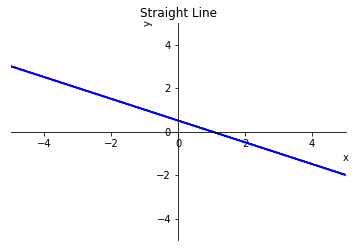

In [3]:
A, B = 1, 1/2
plot_implicit(x / A + y / B - 1, adaptive=False, title="Straight Line")

### Line Segments

絶対値を含む陰関数。

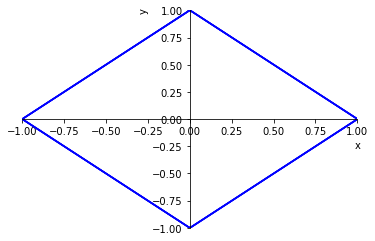

In [4]:
from sympy import Abs
plot_implicit(Abs(x) + Abs(y) - 1, (x, -1, 1), (y, -1, 1), adaptive=False)

### Circle, Ellipse and Hyperbola

二次曲線をプロットする。

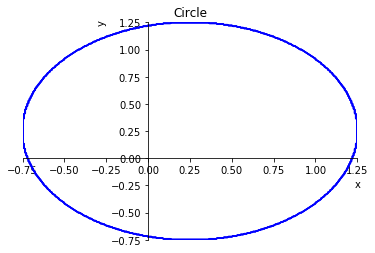

In [5]:
plot_implicit((x - 1/4)**2 + (y - 1/4)**2 - 1, (x, -0.75, 1.25), (y, -0.75, 1.25),
              adaptive=False, title="Circle")

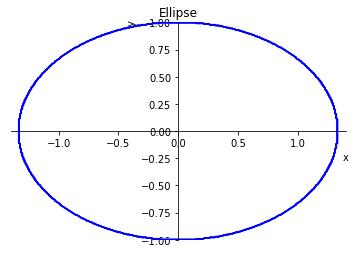

In [6]:
A, B = 4/3, 1
plot_implicit((x / A)**2 + (y / B)**2 - 1, (x, -1.4, 1.4), (y, -1, 1),
              adaptive=False, title="Ellipse")

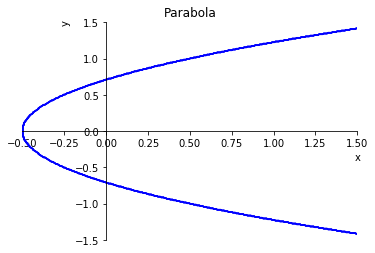

In [7]:
x1, y1 = -1/2, 0
A = 1/4
plot_implicit((y - y1)**2 - 4*A*(x - x1), (x, -0.5, 1.5), (y, -1.5, 1.5),
              adaptive=False, title="Parabola")

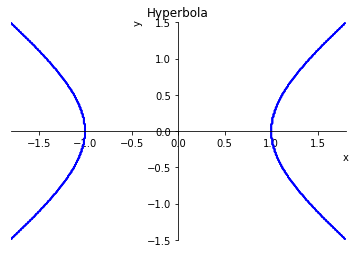

In [8]:
A, B = 1, 1
plot_implicit((x / A)**2 - (y / B)**2 - 1, (x, -1.8, 1.8), (y, -1.5, 1.5),
              adaptive=False, title="Hyperbola")

### Folium of Descartes

本当ならば `h` の値を刻んで同一画面上にプロットするべきだが、このプロット関数はそれに対応していないので棚上げとする。

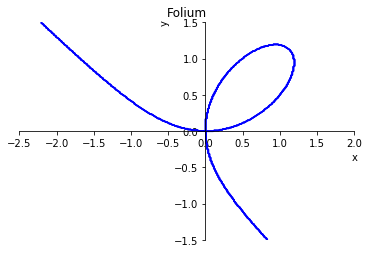

In [9]:
A = 3/4
h = 0
plot_implicit(x**3 - 3*A*x*y + y**3 - h, (x, -2.5, 2.0), (y, -1.5, 1.5),
              adaptive=False, title="Folium")

### Oval of Cassini

こちらも本当ならば h の値を刻んで同一画面上にプロットするべきだが、せめて個別のグラフに表示させてみる。

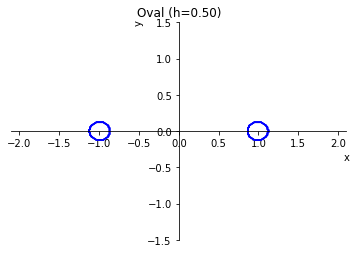

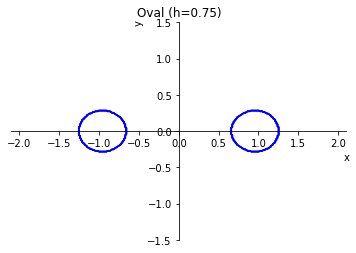

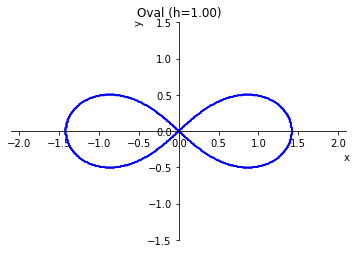

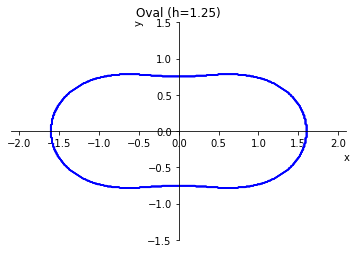

In [11]:
A = 1
H = (0.5, 0.75, 1.0, 1.25)
for h in H:
    plot_implicit((x**2 + y**2 + A**2)**2 - 4*A*x**2 - h**4, (x, -2.1, 2.1), (y, -1.5, 1.5),
                  adaptive=False, title=f"Oval (h={h:.2f})")

## パラメーター表示された曲線をプロットする

曲線が関数の組 $(x(t), y(t))$ で与えられているときは関数 `plot_parametric` を使えばプロットできる。ここではパラメーターを表す変数を `t` とする。また、頻出する関数と定数を `sympy` から取り込んでおく。

In [12]:
from sympy import cos, sin, pi, sqrt
t = symbols('t')

### Lissajous' Curves

Lissajous 曲線は三角関数と位相のズレの組み合わせによって形状を決定する。曲線の周期がいくつあるのかや、曲線が原点を含む条件を考えてみるといい訓練になる。

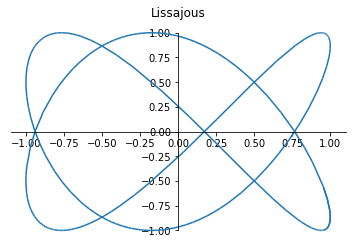

In [13]:
A1, A2 = 0, pi/6
W1, W2 = 2*pi/3, pi
plot_parametric(cos(W1*t + A1), cos(W2 * t + A2), (t, -pi, pi), title="Lissajous")

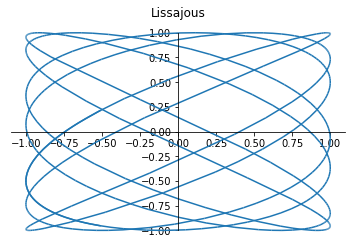

In [15]:
A1, A2 = 0, pi/6
W1, W2 = 7*pi/6, 5*pi/6
plot_parametric(cos(W1*t + A1), sin(W2 * t + A2), (t, -2*pi, 2*pi), title="Lissajous")

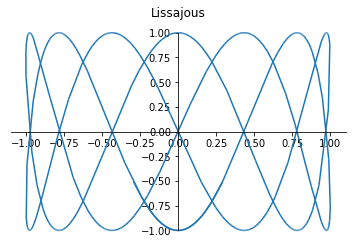

In [16]:
A1, A2 = 0, pi/2
W1, W2 = 2*pi/6, 7*pi/6
plot_parametric(sin(W1*t + A1), sin(W2 * t + A2), (t, -2*pi, 2*pi), title="Lissajous")

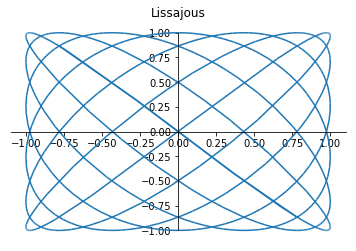

In [17]:
A1, A2 = 0, 0
W1, W2 = pi, 7*pi/6
plot_parametric(sin(W1*t + A1), sin(W2 * t + A2), (t, -2*pi, 2*pi), title="Lissajous")

### Trochoids and Cycloid

これらはパラメーター表示がすべて同じなのでまとめてプロットすることで各形状の違いを強調したい。定数 `d` の符号で trochoid のうねりが変化することがわかる。値がゼロならば曲線は cycloid を描く。

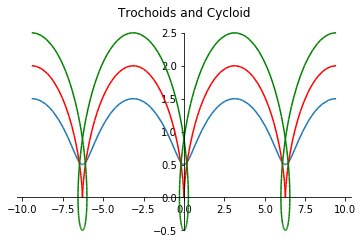

In [18]:
def create_parametric_curve(t, L, r, d):
    return (r * t - (r + d) * sin(t), r - (r + d) * cos(t) + L)

consts = ((0, 1, -1/2), (0, 1, 0), (0, 1, 1/2))
maps = [create_parametric_curve(t, *i) for i in consts]
p = plot_parametric(*maps, (t, -3*pi, 3*pi),
                    show=False, title='Trochoids and Cycloid')
p[1].line_color = 'red'
p[2].line_color = 'green'
p.show()

### Cardioid, Nephroid, Deltoid and Asteroid

これらの曲線はすべて、ある円（転円）が別の固定された円（底円）に接しながら転がるときの転円上のある点の軌跡を表現するものだ。前項と同様にして、同一ビュー上にすべての曲線をプロットして形状を比較しやすくする。

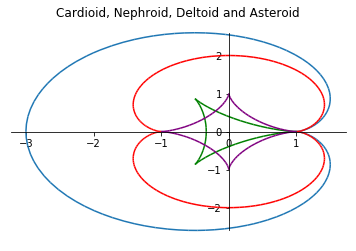

In [19]:
def create_parametric_curve(t, R, r, d):
    return ((R + r) * cos(t) - (r + d) * cos((R + r) / r * t),
             (R + r) * sin(t) - (r + d) * sin((R + r) / r * t))

consts = ((1, 1, 0,), (1, 1/2, 0), (1, -1/3, 0), (1, -1/4, 0))
maps = [create_parametric_curve(t, *i) for i in consts]
p = plot_parametric(*maps, (t, -pi, pi),
                    show=False, title='Cardioid, Nephroid, Deltoid and Asteroid')
p[1].line_color = 'red'
p[2].line_color = 'green'
p[3].line_color = 'purple'
p.show()

### Lemniscate

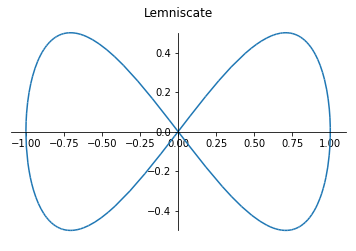

In [20]:
plot_parametric(cos(t), cos(t)*sin(t), (t, -pi, pi), title="Lemniscate")

### Clothoid

積分で定義されたパラメーター曲線だが、SymPy にはこの関数が定義されているのでそのまま利用する。

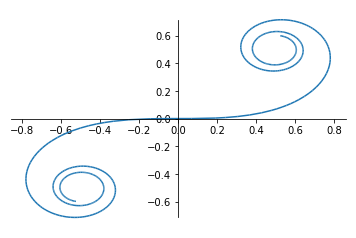

In [21]:
from sympy import fresnelc, fresnels
plot_parametric(fresnelc(t), fresnels(t), (t, -pi, pi))

### Archimedes' Spiral

曲線が極形式で与えられている場合には直交座標系に変換してから `plot_parametric` を適用すればよい。

In [22]:
def plot_polar(r, theta, *args, **kwargs):
    return plot_parametric((r * cos(theta), r * sin(theta)), *args, **kwargs)

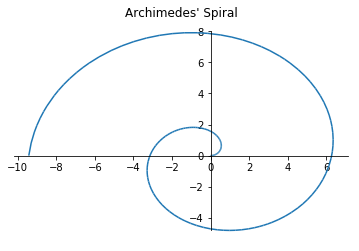

In [23]:
A = 1
r = A * t
plot_polar(r, t, (t, 0, 3*pi), title="Archimedes' Spiral")

### Fermat's Spriral

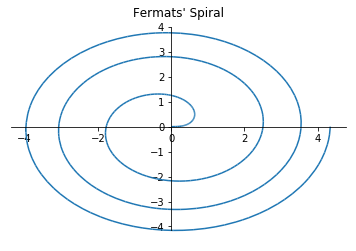

In [24]:
A = 1
r = A * sqrt(t)
plot_polar(r, t, (t, 0, 6*pi), title="Fermats' Spiral")

### Hyperbolic Spiral

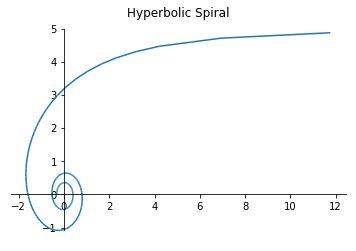

In [25]:
A = 5
r = A / t
plot_polar(r, t, (t, pi/8, 5*pi), title="Hyperbolic Spiral")

### Littus

これは連結成分を二個プロットするので、直接 `plot_parametric` を用いる。正直に言うと先ほど自作した関数 `plot_polar` を複数パラメーター表示入力に対応するやりかたがよくわからなかったのでそうしたまでだ。

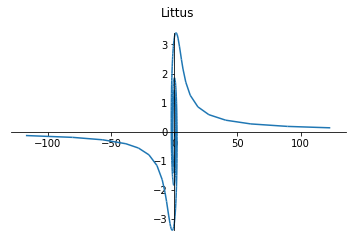

In [26]:
A = 4
r = A / sqrt(t)
plot_parametric((-r * cos(t), -r * sin(t)), (r * cos(t), r * sin(t)), (t, 0, 4*pi), title="Littus")

### Bernoulli's Spiral

そういえば指数関数があまり用いられていない。

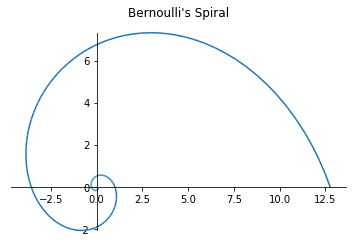

In [27]:
K, A, M = 1, 2/3, 1
r = K * A**(M*t)
plot_polar(r, t, (t, -2*pi, 2*pi), title="Bernoulli's Spiral")

### Nicomedes' Conchoid

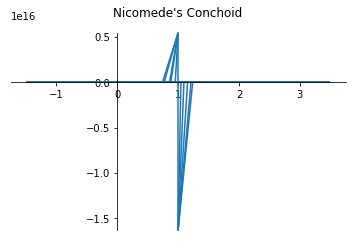

In [28]:
A = 1
maps = [(r * cos(t), r * sin(t)) for r in [A / cos(t) + K for K in np.linspace(0, 2.5, 6)]]
plot_parametric(*maps, (t, -pi/2, 3*pi/2), title="Nicomede's Conchoid")

### Freeth's Nephroid

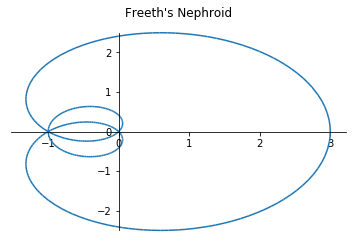

In [29]:
A, K = 1, 1
r = A * (2 * sin(t/2) - K)
plot_polar(r, t, (t, -2*pi, 2*pi), title="Freeth's Nephroid")

### Pascal's Limacon

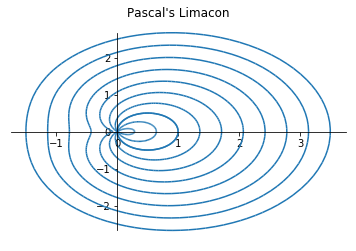

In [30]:
maps = [(r * cos(t), r * sin(t)) for r in [cos(t) + K for K in np.linspace(0, 2.5, 8)]]
plot_parametric(*maps, (t, -pi, pi), title="Pascal's Limacon")

### Cissoid

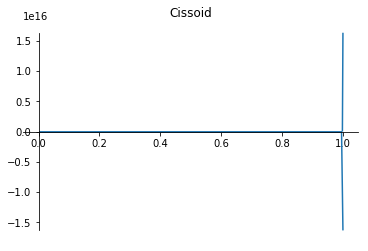

In [31]:
r = 1 / cos(t) - cos(t)
plot_polar(r, t, (t, -pi/2, pi/2), title="Cissoid")

### Trisectrix

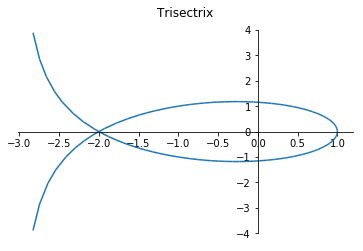

In [32]:
A = 1
r = A / cos(t / 3)
plot_polar(r, t, (t, -1.3*pi, 1.3*pi), title="Trisectrix")

## グラフ表示で与えられた曲線をプロットする

与えられた曲線がグラフ形式、つまり $y = g(x)$ あるいは同じことだが $(x, g(x))$ の形で定義されていれば、関数 `plot` を用いるのが自然だ。

### Catenary

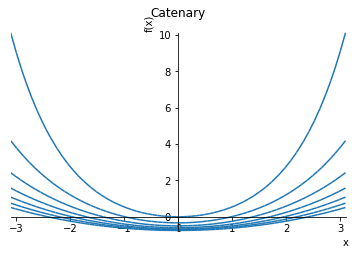

In [33]:
from sympy import cosh

g = [K * (cosh(x / K) - 1) - (K - 1) / K for K in np.linspace(1, 4, 7)]
plot(*g, (x, -3.1, 3.1), title="Catenary")

### Witch of Agnesi

何と読むのかよくわからない曲線だが、有理関数だ。

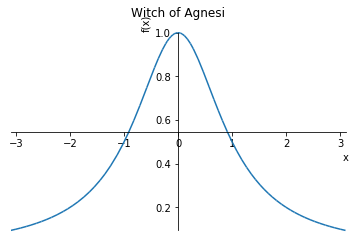

In [34]:
A = 1
plot(A**3 / (A**2 + x**2), (x, -3.1, 3.1), title="Witch of Agnesi")

## 参考資料

* 『POV-Ray で楽しむグラフコレクション』（工学社、2008 年）

  主に第 3 章を参考にした。ほかにも曲率だけから曲線を求めたり、包絡線をプロットしたり、級数からプロットしたりと、実践的な用例が豊富に収録されている。レイトレーシングのアプリケーションで二次元曲線ばっかり描画させている理由が何であるのかは気になるが。